In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
data = load_diabetes()

In [3]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
features_df = pd.DataFrame(data['data'])
features_df.sample(10)

,0,1,2,3,4,5,6,7,8,9
156,-0.016412,-0.044642,-0.010517,0.001215,-0.037344,-0.035760,0.011824,-0.039493,-0.021395,-0.034215
360,0.016281,-0.044642,0.020739,0.021872,-0.013953,-0.013214,-0.006584,-0.002592,0.013317,0.040343
311,0.096197,-0.044642,0.040140,-0.057313,0.045213,0.060690,-0.021311,0.036154,0.012551,0.023775
397,0.052606,-0.044642,-0.004050,-0.030907,-0.046975,-0.058307,-0.013948,-0.025840,0.036060,0.023775
289,-0.074533,0.050680,0.055229,-0.040099,0.053469,0.053174,-0.043401,0.071210,0.061238,-0.034215
209,0.038076,0.050680,-0.018062,0.066629,-0.051103,-0.016658,-0.076536,0.034309,-0.011897,-0.013504
152,-0.034575,0.050680,-0.000817,0.070072,0.039710,0.066952,-0.065491,0.108111,0.026717,0.073480
251,-0.052738,0.050680,0.098342,0.087287,0.060349,0.048790,-0.058127,0.108111,0.084492,0.040343
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064
105,0.023546,0.050680,-0.032073,-0.040099,-0.031840,-0.021669,-0.013948,-0.002592,-0.010903,0.019633


In [5]:
features_df.columns = data['feature_names']
features_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [6]:
target_df = pd.DataFrame(data['target'])
target_df.sample(10)

,0
352,77.0
163,131.0
109,81.0
41,55.0
220,78.0
248,258.0
329,135.0
344,200.0
223,150.0
96,150.0


In [7]:
target_df.columns = ['diabetes']
target_df.head()

,diabetes
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


### Model Architecture

In [8]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Sequential

def model(n_features, hl_activation):
    model = Sequential(
        [
            Input(shape=(n_features,)),
            Dense(128, activation=hl_activation[0]),
            Dense(64, activation=hl_activation[1]),
            Dropout(0.5),
            Dense(32, activation=hl_activation[2]),
            Dropout(0.3),
            Dense(16, activation=hl_activation[3]),
            Dense(16, activation=hl_activation[4]),
            Dense(1)
        ]
    )
    return model

In [9]:
hl_activation = ['relu', 'tanh', 'relu', 'tanh', 'relu']

dnn_model = model(n_features=4, hl_activation=hl_activation)
dnn_model.summary()

2024-08-29 00:58:08.215674: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-08-29 00:58:08.215705: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-08-29 00:58:08.215712: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-08-29 00:58:08.215734: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-29 00:58:08.215752: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,793 (46.07 KB)

 Trainable params: 11,793 (46.07 KB)

 Non-trainable params: 0 (0.00 B)

### Model building

In [10]:
X, y = load_diabetes(return_X_y=True)

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
Xtrain.shape

(353, 10)

In [13]:
n_features = Xtrain.shape[1]

In [14]:
dnn_model_diabestes = model(n_features, hl_activation)
dnn_model_diabestes.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,561 (49.07 KB)

 Trainable params: 12,561 (49.07 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
scaler = StandardScaler()

In [16]:
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [17]:
# Make a directory 'Graph' for example for tensorboard graphs
os.makedirs('Graph', exist_ok=True)

# Define now our callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=50),
             TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)]

dnn_model_diabestes.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error', 'r2_score'])

# Now fit the model on 500 epoches with a batch size of 64
history = dnn_model_diabestes.fit(x=Xtrain, y=ytrain, validation_split=.3, epochs=500, batch_size=64, callbacks=callbacks)

Epoch 1/500


2024-08-29 00:58:13.787693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - loss: 30122.0391 - mean_squared_error: 30122.0391 - r2_score: -3.8820 - val_loss: 30282.8164 - val_mean_squared_error: 30282.8164 - val_r2_score: -3.6052
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 28483.7773 - mean_squared_error: 28483.7773 - r2_score: -4.1741 - val_loss: 30193.1914 - val_mean_squared_error: 30193.1914 - val_r2_score: -3.5916
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 27250.6113 - mean_squared_error: 27250.6113 - r2_score: -3.8592 - val_loss: 30078.5020 - val_mean_squared_error: 30078.5020 - val_r2_score: -3.5742
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 28943.3379 - mean_squared_error: 28943.3379 - r2_score: -3.7395 - val_loss: 29936.5234 - val_mean_squared_error: 29936.5234 - val_r2_score: -3.5526
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 28254.0918 - mean_squared_error: 28254.0918 - r2_score: -3.8290 - val_loss: 29783.1133 - val_mean_squared_error: 29783.1133 - val

In [18]:
loss, mse, r2_score = dnn_model_diabestes.evaluate(Xtest, ytest, verbose=0)
print('loss is:', loss, "= MSE = ", mse)
print("R2 score", r2_score)

loss is: 3853.356689453125 = MSE =  3853.356689453125
R2 score 0.2769043445587158


### Classical linear regression

In [19]:
reg_model = LinearRegression()

In [20]:
reg_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [21]:
reg_model.fit(Xtrain, ytrain)

LinearRegression()

In [22]:
reg_pred = reg_model.predict(Xtest)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
mse = mean_squared_error(ytest, reg_pred)
mse

2992.581229301017

With logistic regression the loss is even smaller.

In [25]:
# Root Mean Squared Error
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error
mae = mean_absolute_error(ytest, reg_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared
r2 = r2_score(ytest, reg_pred)
print("R-squared (R²):", r2)

Root Mean Squared Error (RMSE): 54.70449002870804
Mean Absolute Error (MAE): 41.97492114949365
R-squared (R²): 0.4384316213369279


The second model is outperforming the deep neural network since it provides a lower cost and a higher R-squared error.

Now let's have a look on the generated graph by tensorboard (for fun).

In [30]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [32]:
%tensorboard --logdir=../graphs

Reusing TensorBoard on port 6006 (pid 71167), started 0:00:04 ago. (Use '!kill 71167' to kill it.)

You will get results like this (or better :) )

Loss graph:
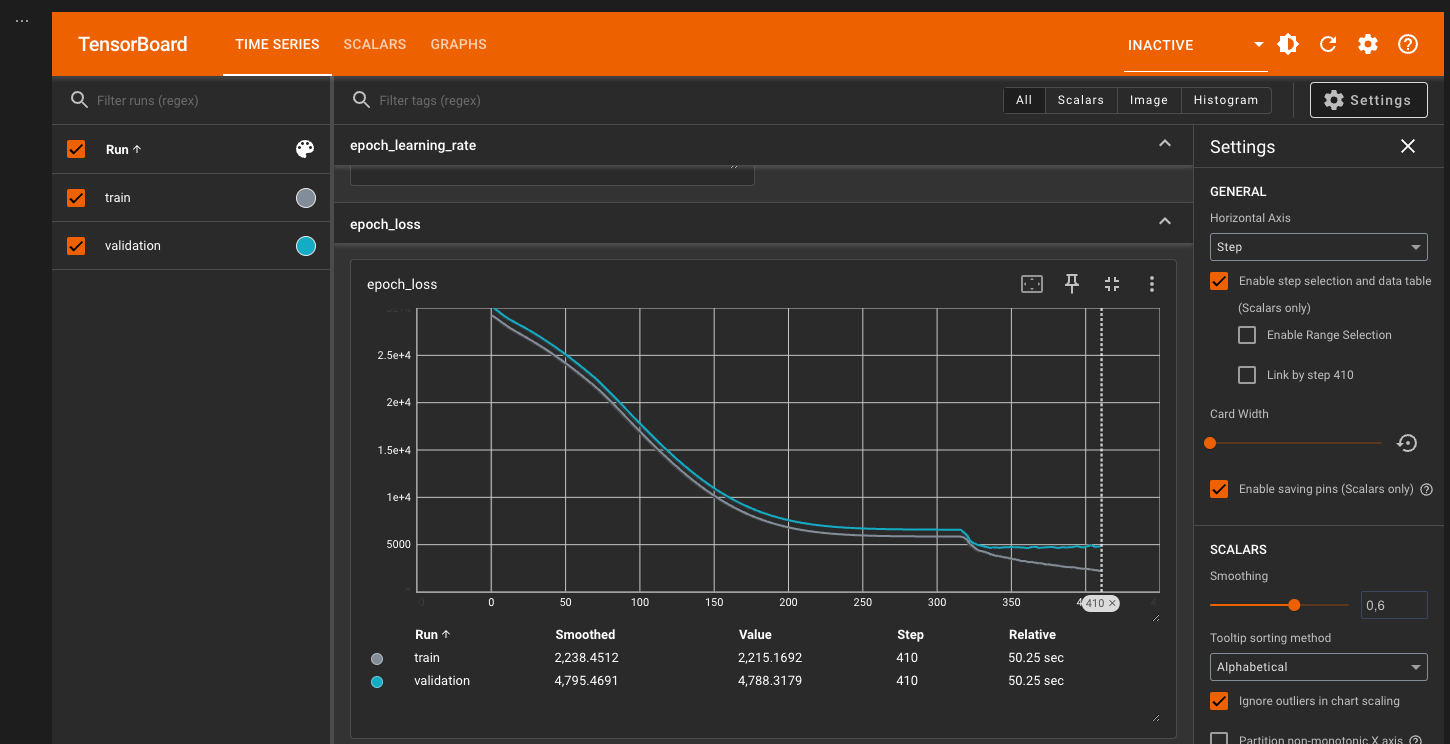

R2-score graph:
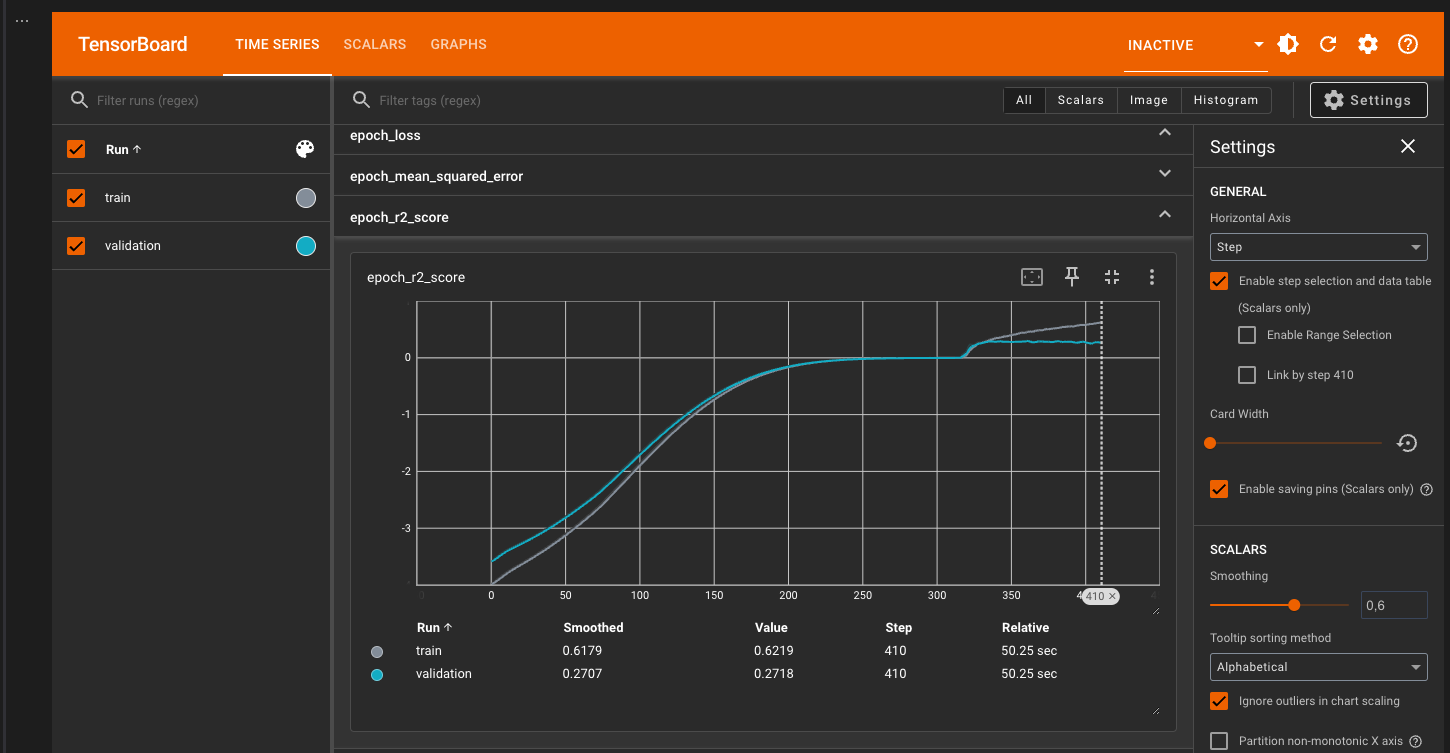